# Evaluating Classifiers
<hr style="border:2px solid black">

## 1. Warmup: Skin Cancer Detection

Two new skin cancer detection classifiers have been developed and tested on 1000 images of patients’ skins of which 50 show signs of cancer:

- The first model predicts a high risk of cancer for 800 out of 1000 patients’ images in the test set. Of these 800 images 50 actually show signs of skin cancer. Hence, all problematic images are correctly identified.

- The second classifier categorizes 100 out of 1000 images into the high risk group. 40 of the 100 images show real signs of cancer. 10 images are not identified and falsely classified as low-risk.

Compare the outcome of these two classifiers. Which one do you prefer?

### Discussion:

- 1000 patients in total
- 50 of them show signs of cancer

- Depends if we want to focus on saving lives or on cutting costs to re-evaluate the 800 positive classifications

Model 1:
- If we tell 800 people that they probably have cancer, this is upsetting
- We catch all the real cancer cases

Model 2:
- We need to re-test many people
- The 10 which were mis-labellec could be early stage cancer (harder to detect)  - would need follow up appointments

If the use case is cancer detection, model 1 seems like the better model

### Model 1

In [165]:
TP = 50  #model guesses cancer, and in reality it is cancer
TN = 200 #model guesses it is NOT cancer, and in reality it is NOT cancer (1000-800)
FP = 750 #model guesses cancer, but in reality it is NOT cancer (800-50)
FN = 0   #model guesses it is NOT cancer, but in reality it is cancer

##### Accuracy - how  many predictions are correct?

In [166]:
# Accuracy of the model: How many of all our predictions are correct?
m1_accuracy = (TP+TN)/(TP+TN+FP+FN)
m1_accuracy

0.25

The accuracy of this model is terrible but it does manage to correctly label all positive cancer cases. What other metrics could we use to reflect this?

##### Recall aka. Sensitivity

- if we are only interested in catching all the true positive cases
- a false positive is not as bad as a false negative and we want to reflect this

In [167]:
m1_recall= TP / (TP + FN)
m1_recall

1.0

The recall score is 1 because this model doesn't miss any of the true cancer cases.

##### Precision aka. Specificity

- if the model guesses a positive case, it should be very sure that it is in fact positive.
- eg. in spam detection: it's worse if an important email is falsely categorized as spam than the other way around.

In [168]:
m1_precision= TP / (TP + FP)
m1_precision

0.0625

The precision score is very low as the model miscategorises a lot of true negatives as cancer.

### Model 2

In [169]:
TP = 40  #model guesses cancer, and in reality it is cancer
TN = 890 #model guesses it's NOT cancer, and in reality it is NOT cancer (1000 - (100 + 10)), or (900 - 10)
FP = 60  #model guesses cancer, but in reality it is NOT cancer (100 - 40)
FN = 10  #model guesses it is NOT cancer, but in reality it is cancer

In [170]:
m2_accuracy = (TP+TN)/(TP+TN+FP+FN)
m2_accuracy

0.93

In [171]:
m2_recall= TP / (TP + FN)
m2_recall

0.8

In [172]:
m2_precision = TP / (TP + FP)
m2_precision

0.4

As we have seen, accuracy loses a lot of its value as an evaluation metric if we are interested in minimising one type of error over another.

Another issue with accuracy is that if we have an **imbalanced dataset**, it becomes increasingly useless. 

### Model 3: Baseline Model (nobody has cancer)

In [173]:
# We predict that it's not cancer in every case.
# remember: 950 do not have cancer, and 50 do.
# "positive" = cancer

TP = 0   #model guesses cancer, and in reality it is cancer
TN = 950 #model guesses NOT cancer, and in reality it is NOT cancer 
FP = 0   #model guesses cancer, but in reality it is NOT cancer 
FN = 50  #model guesses NOT cancer, but in reality it is cancer

In [174]:
m3_recall= TP / (TP + FN)
m3_recall

0.0

In [175]:
#m3_precision = TP / (TP + FP)
#m3_precision

This model has a higher accuracy score than Model 2 which correctly identified 40 out of 50 cancer cases!

<hr style="border:2px solid black">

## 2. Evaluation Metrics

### 2.1 `Confusion Matrix`

>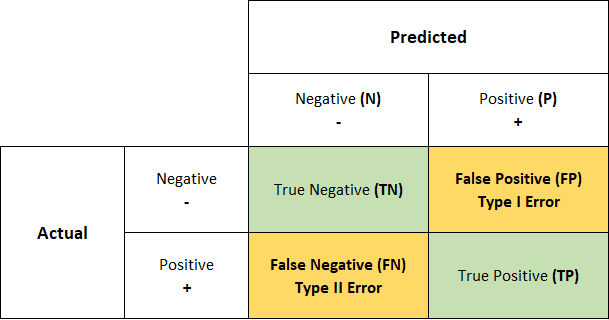

<br>

### 2.2 `Accuracy`

>$$ Accuracy = \dfrac{TP+TN}{TP+TN+FP+FN}$$ 

### 2.3 `Recall`

>$$
Recall = \dfrac{TP}{TP+FN}
$$
>- Recall/Sensitivity => **Inclusive** 
>- High Recall => **most of the relevant results returned** (at the expense of including bad results) 
>- High when false negatives are low 

### 2.4 `Precision`

>$$
Precision = \dfrac{TP}{TP+FP}
$$
>- Precision => **Exact**: a trade off between "exactness" and "totalness"
>- High Precision => **more relevant than irrelevant results returned** (at the expense of missing some relevant ones)
>- High when false positives are low

### 2.5 `F1 Score`

>$$
F1 = 2 \cdot \dfrac{Precision \cdot Recall}{Precision + Recall}
$$
>- harmonic mean of precision and recall
>- takes care of both false negative and false positive errors

<hr style="border:2px solid black">

## 3. Example: Breast Cancer Detection

In [176]:
pip install scikit-metrics

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


**Load Packages**

In [177]:
# data analysis stack
import numpy as np
import pandas as pd

# data visualization stack
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set_style('whitegrid')

# miscellaneous
import warnings
warnings.filterwarnings("ignore")

# machine learning stack
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

# evaluation metrics
from sklearn.metrics import accuracy_score, precision_score, recall_score, classification_report  
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import RocCurveDisplay, roc_curve, roc_auc_score
from sklearn.metrics import precision_recall_curve #plot_precision_recall_curve

#### 1. Get data

In [178]:
from sklearn.datasets import load_breast_cancer
cancer_data = load_breast_cancer(as_frame=True)

In [179]:
X = pd.DataFrame(cancer_data.data)
y= cancer_data.target

In [180]:
X.head(3)

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.8,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.6,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.9,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.8,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.0,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.5,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758


In [181]:
y.value_counts(normalize=True)

1    0.627417
0    0.372583
Name: target, dtype: float64

In [182]:
X.shape, y.shape

((569, 30), (569,))

#### 2. Split Data

In [183]:
# train/test split and stratify by the target variable
X_train, X_test, y_train, y_test = train_test_split(X, y,  test_size= 0.2, stratify=y, random_state=42)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((455, 30), (114, 30), (455,), (114,))

#### 3. Train a Model

In [184]:
m = LogisticRegression(max_iter=3000) #create a model
m.fit(X_train,y_train) #train the model

LogisticRegression(max_iter=3000)

#### 4. Evaluate model

In [185]:
# train accuracy
m.score(X_train,y_train)  

0.9560439560439561

In [186]:
# test accuracy
m.score(X_test,y_test)  

0.9649122807017544

In [187]:
# test accuracy
ypred = m.predict(X_test) 
accuracy_score(y_test,ypred)

0.9649122807017544

Train and test accuracy are quite close so we don't seem to have too much overfitting

In [188]:
# Precision and Recall
precision = precision_score(y_test,ypred)
recall = recall_score(y_test,ypred)

print(f'Precision = {precision:.4f} \nRecall = {recall:.4f}')


Precision = 0.9595 
Recall = 0.9861


In [189]:
# Classification report summarises all the metrics for each class:
# The support is the number of occurrences of each class in y_true.

print(classification_report(y_test, ypred, target_names=['not cancer', 'cancer']))

# Can also be returned as a dictionary using the output_dict parameter 

              precision    recall  f1-score   support

  not cancer       0.97      0.93      0.95        42
      cancer       0.96      0.99      0.97        72

    accuracy                           0.96       114
   macro avg       0.97      0.96      0.96       114
weighted avg       0.97      0.96      0.96       114



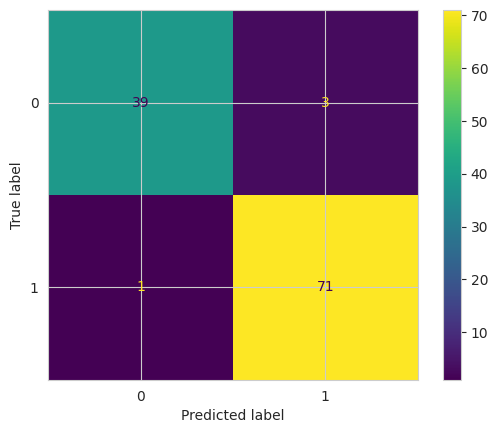

In [190]:
# Sklearn has an inbuilt Confusion Matrix Display class:
ConfusionMatrixDisplay.from_predictions(y_test, ypred, normalize=None);


Text(0.5, 1.0, 'Confusion Matrix')

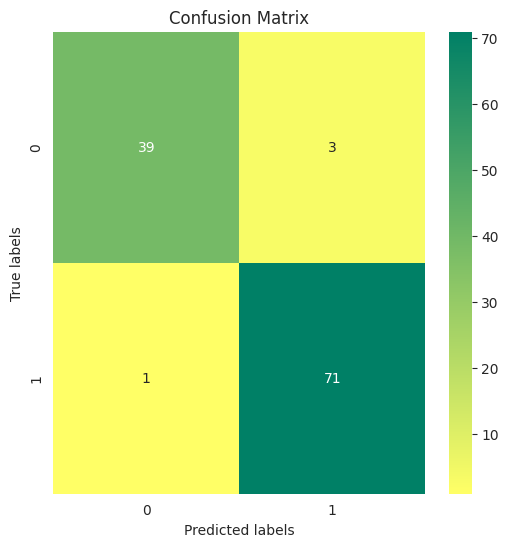

In [191]:
# Confusion Matrix using Seaborn Heatmap
conf = confusion_matrix(y_test,ypred)

#plot the heatmap
fig = plt.figure(figsize=(6, 6))
ax = plt.subplot()
sns.heatmap(conf, annot=True, ax = ax, cmap='summer_r', fmt='g')

ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix')

##### (Bonus) Receiver Operator Curve (ROC) and Area Under the Curve (AUC)

ROC plots the **false positive rate** (1-Precision) (x axis) against the **true positive rate** (Recall) (y axis) for **every classification threshold**. 

AUC is the area under ROC and is a useful measure when comparing classifiers as we can plot their ROC on the same graph. Ideally AUC is as close to 1 as possible so the model with the highest AUC is a good one to choose. The ROC can help us choose which classification threshold we want to use for our chosen model.

The output of our Logistic Regression is actually an array probabilities rather than binary classes

In [192]:
test_probs= m.predict_proba(X_test)
test_probs[:4]

array([[1.00000000e+00, 3.57218416e-11],
       [3.61865118e-05, 9.99963813e-01],
       [9.48585312e-01, 5.14146882e-02],
       [3.96047955e-01, 6.03952045e-01]])

The default setting is to classify datapoints around the threshold 0.5 but this doesn't have to be the case! We can compare all possible thresholds to find one that suits our needs in terms of precision/recall. Instead of generating many confusion matrices and trying to compare them, we can plot the TP vs FP rates as a curve:

In [193]:
roc_curve(y_test, test_probs[:,1])

(array([0.        , 0.        , 0.        , 0.07142857, 0.07142857,
        0.11904762, 0.11904762, 1.        ]),
 array([0.        , 0.01388889, 0.94444444, 0.94444444, 0.98611111,
        0.98611111, 1.        , 1.        ]),
 array([1.99999533e+00, 9.99995334e-01, 7.73801388e-01, 7.07072149e-01,
        5.07537611e-01, 2.51206688e-01, 2.22665912e-01, 3.83865041e-35]))

In [194]:
# Area under the ROC:
roc_auc_score(y_test, test_probs[:,1])

0.9953703703703703

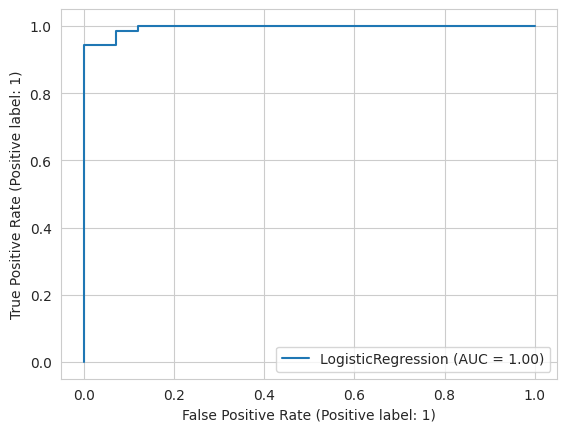

In [195]:
#Plotting the curve in sklearn: 
RocCurveDisplay.from_estimator(m, X_test, y_test);

### Baseline Models

We always need a baseline model to compare our trained model(s) with. These can be:
- A dummy model which always predicts the same outcome (eg. nobody gets cancer, everyone drowns)
- the latest state-of-the-art model 
- human judgement

We should always compare the performance of our models to some established baselines. This is especially true for complicated machine learning solutions that require a lot of resources. When presenting a new approach we need to justify its high costs!

In [ ]:
from sklearn.dummy import DummyClassifier

dummy_clf = DummyClassifier(strategy='most_frequent')
dummy_clf.fit(X_train, y_train)
y_dummy=dummy_clf.predict(X_test)
# Predicts that everyone has cancer as this was the larger class.

print(classification_report(y_test, y_dummy, target_names=['not cancer', 'cancer'], zero_division=0))

## Next Steps

- Do the [exercises in the course material](https://spiced.space/ordinal-oregano/ds-course/chapters/project_titanic/evaluating_classifiers/README.html)
- See if you can calculate and plot an ROC curve from scratch
- **Advanced!** See if you can choose a classification threshold that optimises for precision and recall, generate predictions according to this threshold, and evaluate these predictions 

## References
- [Great introductory explainer of ROC and AUC](https://www.youtube.com/watch?v=4jRBRDbJemM)
